In [70]:
#Imports
import os
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

In [71]:
#reader
#with open( "NBA_season1718_salary.csv", "r", newline="") as fp:
#    reader= csv.reader(fp, delimiter=",")
#    rows = [x[:1] + [';'.join(x[1:-2])] + x[-2:] for x in reader] 
#    df = pd.DataFrame(rows)
    

In [72]:
salary_file = "NBA_season1718_salary.csv"

In [73]:
salary_file_df = pd.read_csv(salary_file,encoding="ISO-8859-1" )
salary_file_df.set_index('Player')
salary2= salary_file_df.rename(columns={'season17_18': 'Salary', 'Tm':'Team'})

salary2.head()


,Unnamed: 0,Player,Team,Salary
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [74]:
salary2.count()

Unnamed: 0    573
Player        573
Team          573
Salary        573
dtype: int64

In [75]:
#List of Teams
unique_team = salary2["Team"].unique()
unique_team

array(['GSW', 'CLE', 'DEN', 'BOS', 'DET', 'TOR', 'OKC', 'MEM', 'HOU',
       'POR', 'NOP', 'MIA', 'WAS', 'CHA', 'DAL', 'PHI', 'LAL', 'LAC',
       'MIL', 'UTA', 'SAS', 'IND', 'NYK', 'BKN', 'MIN', 'PHX', 'ORL',
       'ATL', 'CHI', 'SAC'], dtype=object)

In [76]:
#count = unique_team["Tm"]["season17_18"]

In [77]:
team_salary = salary2.groupby(by=["Team"])['Salary'].sum()
team_salary

Team
ATL    100217797.0
BKN     96039772.0
BOS    115009962.0
CHA    117228164.0
CHI     89425042.0
CLE    137288549.0
DAL     85821361.0
DEN    107889099.0
DET    120086105.0
GSW    137494845.0
HOU    119024081.0
IND     94429791.0
LAC    118907163.0
LAL    105355450.0
MEM    110104061.0
MIA    131222624.0
MIL    120686318.0
MIN    117468554.0
NOP    119725571.0
NYK    107855405.0
OKC    134294056.0
ORL     96925954.0
PHI    100794278.0
PHX     94818333.0
POR    119108924.0
SAC     95627528.0
SAS    116153554.0
TOR    116528796.0
UTA    107465014.0
WAS    124179842.0
Name: Salary, dtype: float64

In [78]:
####PER STUFF player_PER.csv
PER_File = "player_PER.csv"
PER_df = pd.read_csv(PER_File,encoding="ISO-8859-1" )
PER_df.set_index('PLAYER')
PER_df.head()

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM
0,49.0,John Wall,41.0,34.4,0.515,29.7,11.9,30.3,1.8,10.2,6.0,19.20,172.5,5.8,WAS
1,56.0,Bradley Beal,82.0,36.3,0.564,16.7,9.6,26.8,2.3,11.5,6.9,18.51,355.7,11.9,WAS
2,57.0,Otto Porter Jr.,77.0,31.6,0.602,13.4,6.4,17.7,4.8,18.1,11.4,18.37,285.6,9.5,WAS
3,134.0,Tomas Satoransky,73.0,22.5,0.615,36.0,10.4,14.8,5.0,11.1,8.0,15.35,119.0,4.0,WAS
4,151.0,Marcin Gortat,82.0,25.3,0.546,17.1,11.2,15.2,9.9,24.0,17.0,14.70,127.0,4.2,WAS


In [79]:
#team_PER = PER_df.groupby(by=["TEAM"])['PER'].sum()
#team_PER

In [80]:
combo= pd.merge(PER_df, salary2, left_on='PLAYER', right_on='Player').drop('Player', axis=1)
combo

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM,Unnamed: 0,Team,Salary
0,49.0,John Wall,41.0,34.4,0.515,29.7,11.9,30.3,1.8,10.2,6.0,19.20,172.5,5.8,WAS,49,WAS,18063850.0
1,56.0,Bradley Beal,82.0,36.3,0.564,16.7,9.6,26.8,2.3,11.5,6.9,18.51,355.7,11.9,WAS,20,WAS,23775506.0
2,134.0,Tomas Satoransky,73.0,22.5,0.615,36.0,10.4,14.8,5.0,11.1,8.0,15.35,119.0,4.0,WAS,260,WAS,3000000.0
3,151.0,Marcin Gortat,82.0,25.3,0.546,17.1,11.2,15.2,9.9,24.0,17.0,14.70,127.0,4.2,WAS,94,WAS,12782609.0
4,189.0,Mike Scott,76.0,18.5,0.599,11.2,11.0,19.0,4.0,15.8,9.9,13.72,46.7,1.6,WAS,348,WAS,1709538.0
5,201.0,Markieff Morris,73.0,27.0,0.566,14.0,12.5,18.8,4.3,19.2,11.8,13.30,52.8,1.8,WAS,141,WAS,8000000.0
6,237.0,Jodie Meeks,77.0,14.5,0.548,12.7,6.7,18.2,1.5,11.2,6.4,12.44,32.4,1.1,WAS,246,WAS,3290000.0
7,241.0,Ian Mahinmi,77.0,14.9,0.601,11.6,21.9,14.8,13.4,17.4,15.4,12.25,28.2,0.9,WAS,63,WAS,16661641.0
8,263.0,Tim Frazier,59.0,14.2,0.475,44.5,13.1,14.7,2.4,13.1,7.8,11.32,4.0,0.1,WAS,331,WAS,2000000.0
9,285.0,Jae Crowder,80.0,26.1,0.525,10.9,8.1,14.1,3.2,11.5,7.4,10.44,-33.1,-1.1,UTA,162,UTA,6796117.0


In [81]:
combo.count()
#problem, seem to be missing a few

RK            348
PLAYER        348
GP            348
MPG           348
TS%           348
AST           348
TO            348
USG           348
ORR           348
DRR           348
REBR          348
PER           348
VA            348
EWA           348
TEAM          348
Unnamed: 0    348
Team          348
Salary        348
dtype: int64

In [82]:
test = combo.sort_values('PER', ascending=False)
test
#appears we have an issue with trades

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM,Unnamed: 0,Team,Salary
216,1.0,James Harden,72.0,35.4,0.619,23.2,11.6,35.9,1.8,15.2,8.6,29.87,718.5,23.9,HOU,9,HOU,28299399.0
123,2.0,Anthony Davis,75.0,36.4,0.612,8.4,7.9,27.7,7.7,24.8,16.5,28.98,711.4,23.7,NOP,21,NOP,23775506.0
274,3.0,LeBron James,82.0,36.9,0.621,25.7,11.9,31.7,3.7,22.3,13.1,28.65,819.5,27.3,CLE,2,CLE,33285709.0
227,4.0,Stephen Curry,51.0,32.0,0.675,21.2,10.5,30.0,2.7,14.4,9.0,28.32,421.7,14.1,GSW,1,GSW,34682550.0
147,5.0,Giannis Antetokounmpo,75.0,36.7,0.598,15.9,9.8,29.8,6.7,25.3,16.0,27.37,652.7,21.8,MIL,33,MIL,22471910.0
228,6.0,Kevin Durant,68.0,34.2,0.640,18.6,10.5,29.1,1.6,19.5,11.2,26.05,539.7,18.0,GSW,16,GSW,25000000.0
53,7.0,Damian Lillard,73.0,36.6,0.594,20.6,8.8,30.5,2.6,10.6,6.6,25.19,565.4,18.8,POR,13,POR,26153057.0
30,8.0,LaMarcus Aldridge,75.0,33.5,0.570,8.5,6.2,27.5,10.8,17.3,14.0,25.12,510.2,17.0,SAS,36,SAS,21461010.0
312,9.0,Kyrie Irving,60.0,32.2,0.610,18.6,8.5,30.3,1.9,10.8,6.4,25.03,404.4,13.5,BOS,48,BOS,18868625.0
137,10.0,Karl-Anthony Towns,82.0,35.6,0.646,11.7,9.3,21.9,9.3,30.9,20.0,24.99,626.6,20.9,MIN,172,MIN,6216840.0


Text(0.5,1,'Player Efficency vs. Salary')

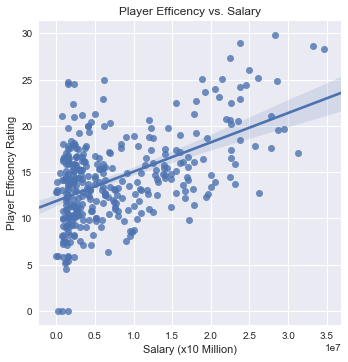

In [132]:
g = sns.lmplot(x="Salary", y="PER", data=combo)
g.set(xlabel='Salary (x10 Million)', ylabel='Player Efficency Rating')
plt.title('Player Efficency vs. Salary')

Text(0,0.5,'Player Efficency Rating (PER)')

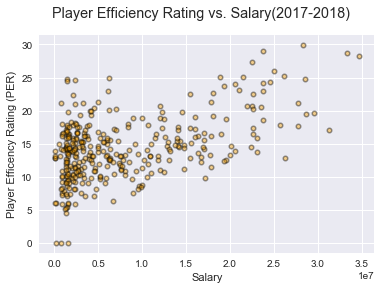

In [86]:
plt.scatter(combo["Salary"],
            combo["PER"],
            color = "Orange",
            edgecolors = 'black',
            s= 20,
            alpha=0.42,
            linewidth = 1.5,
           )
plt.suptitle("Player Efficiency Rating vs. Salary(2017-2018)")
plt.xlabel("Salary")
plt.ylabel("Player Efficency Rating (PER)")

In [135]:
#AVG TEAM EFFICEncy
team_PER = PER_df.groupby(by=["TEAM"])['PER'].mean()
team_PER

TEAM
ATL    13.528182
BKN    13.388182
BOS    13.978462
CHA    13.794167
CHI    12.400714
CLE    15.681667
DAL    14.689000
DEN    15.315455
DET    14.079167
GSW    16.577333
HOU    15.838333
IND    15.350000
LAC    13.349286
LAL    13.477273
MEM    13.263077
MIA    14.710000
MIL    14.373333
MIN    16.461111
NOP    15.583636
NYK    15.221818
OKC    13.351667
ORL    13.215714
PHI    14.576923
PHX    13.181818
POR    14.260000
SAC    13.744545
SAS    14.574615
TOR    15.818182
UTA    14.984545
WAS    14.650000
Name: PER, dtype: float64

In [150]:
print(type(team_PER))

<class 'pandas.core.series.Series'>


In [117]:
#Win DATA
win_file = "team_win_data.csv"

In [119]:
win_df = pd.read_csv(win_file,encoding="ISO-8859-1" )
win_df

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb
0,Toronto Raptors*Â (1)Â,59,23,0.720,â,111.7,103.9,7.29,East,TOR
1,Boston Celtics*Â (2)Â,55,27,0.671,4,104.0,100.4,3.23,East,BOS
2,Philadelphia 76ers*Â (3)Â,52,30,0.634,7,109.8,105.3,4.30,East,PHI
3,Cleveland Cavaliers*Â (4)Â,50,32,0.610,9,110.9,109.9,0.59,East,CLE
4,Indiana Pacers*Â (5)Â,48,34,0.585,11,105.6,104.2,1.18,East,IND
5,Miami Heat*Â (6)Â,44,38,0.537,15,103.4,102.9,0.15,East,MIA
6,Milwaukee Bucks*Â (7)Â,44,38,0.537,15,106.5,106.8,-0.45,East,MIL
7,Washington Wizards*Â (8)Â,43,39,0.524,16,106.6,106.0,0.53,East,WAS
8,Detroit PistonsÂ (9)Â,39,43,0.476,20,103.8,103.9,-0.26,East,DET
9,Charlotte HornetsÂ (10)Â,36,46,0.439,23,108.2,108.0,0.07,East,CHA


In [160]:
team_avg_per = pd.DataFrame({'TEAM':team_PER.index, 'Avg. PER':team_PER.values})
team_avg_per

,Avg. PER,TEAM
0,13.528182,ATL
1,13.388182,BKN
2,13.978462,BOS
3,13.794167,CHA
4,12.400714,CHI
5,15.681667,CLE
6,14.689000,DAL
7,15.315455,DEN
8,14.079167,DET
9,16.577333,GSW


In [164]:
combo2= pd.merge(win_df, team_avg_per, left_on='Team_Abb', right_on='TEAM').drop('TEAM', axis=1)
combo2

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb,Avg. PER
0,Toronto Raptors*Â (1)Â,59,23,0.720,â,111.7,103.9,7.29,East,TOR,15.818182
1,Boston Celtics*Â (2)Â,55,27,0.671,4,104.0,100.4,3.23,East,BOS,13.978462
2,Philadelphia 76ers*Â (3)Â,52,30,0.634,7,109.8,105.3,4.30,East,PHI,14.576923
3,Cleveland Cavaliers*Â (4)Â,50,32,0.610,9,110.9,109.9,0.59,East,CLE,15.681667
4,Indiana Pacers*Â (5)Â,48,34,0.585,11,105.6,104.2,1.18,East,IND,15.350000
5,Miami Heat*Â (6)Â,44,38,0.537,15,103.4,102.9,0.15,East,MIA,14.710000
6,Milwaukee Bucks*Â (7)Â,44,38,0.537,15,106.5,106.8,-0.45,East,MIL,14.373333
7,Washington Wizards*Â (8)Â,43,39,0.524,16,106.6,106.0,0.53,East,WAS,14.650000
8,Detroit PistonsÂ (9)Â,39,43,0.476,20,103.8,103.9,-0.26,East,DET,14.079167
9,Charlotte HornetsÂ (10)Â,36,46,0.439,23,108.2,108.0,0.07,East,CHA,13.794167


Text(0.5,1,'Team Player Efficency vs. Victory')

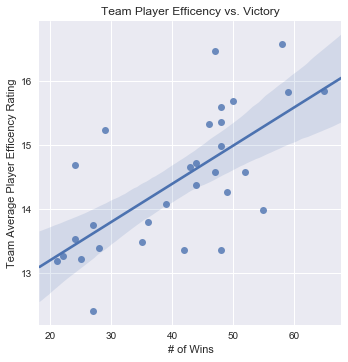

In [165]:
g = sns.lmplot(x="W", y="Avg. PER", data=combo2)
g.set(xlabel='# of Wins', ylabel='Team Average Player Efficency Rating')
plt.title('Team Player Efficency vs. Victory')